In [1]:
import pandas as pd
import numpy as np
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PHcB6yl_E-2iSb3gNbHzbvKVohnK4ulwpya5Yz8T4T6S',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'webphishing-donotdelete-pr-vtxqdsfdqpv8re'
object_key = 'dataset_website (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

ds= pd.read_csv(body)
ds.head()
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
ds.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [4]:
ds.isnull().any()

index                          False
having_IPhaving_IP_Address     False
URLURL_Length                  False
Shortining_Service             False
having_At_Symbol               False
double_slash_redirecting       False
Prefix_Suffix                  False
having_Sub_Domain              False
SSLfinal_State                 False
Domain_registeration_length    False
Favicon                        False
port                           False
HTTPS_token                    False
Request_URL                    False
URL_of_Anchor                  False
Links_in_tags                  False
SFH                            False
Submitting_to_email            False
Abnormal_URL                   False
Redirect                       False
on_mouseover                   False
RightClick                     False
popUpWidnow                    False
Iframe                         False
age_of_domain                  False
DNSRecord                      False
web_traffic                    False
P

In [5]:
ds.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ds.dtypes

index                          int64
having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [7]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [8]:
x

array([[    1,    -1,     1, ...,     1,     1,    -1],
       [    2,     1,     1, ...,     1,     1,     1],
       [    3,     1,     0, ...,     1,     0,    -1],
       ...,
       [11053,     1,    -1, ...,     1,     0,     1],
       [11054,    -1,    -1, ...,     1,     1,     1],
       [11055,    -1,    -1, ...,    -1,     1,    -1]])

In [9]:
y

array([-1, -1, -1, ..., -1, -1, -1])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
lr=LogisticRegression()
lr.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred1=lr.predict(x_test )
from sklearn.metrics import accuracy_score
lr=accuracy_score(y_test,y_pred1)
lr

0.9176843057440073

In [18]:
import pickle
pickle.dump(lr,open('phishing_website.pkl','wb'))

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Testing Sensitivity for logistic regression 0.9279835390946503
Testing Specificity for logistic regression 0.9096045197740112
Testing Precision for logistic regression 0.8895463510848126
Testing accuracy for logistic regression 0.9176843057440073


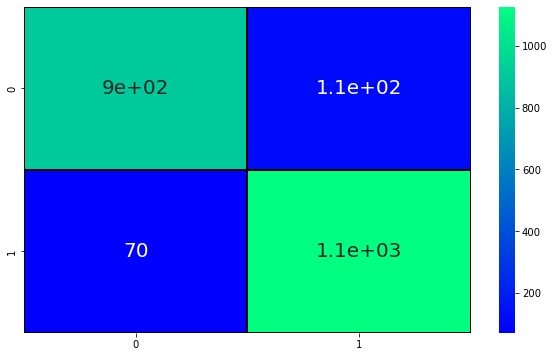

In [14]:
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for logistic regression',(TP/(TP+FN)))
print('Testing Specificity for logistic regression',(TN/(TN+FP)))
print('Testing Precision for logistic regression',(TP/(TP+FP)))
print('Testing accuracy for logistic regression',accuracy_score(y_test,y_pred1))

In [15]:
!pip install -U ibm-watson-machine-learning

In [16]:
from ibm_watson_machine_learning import APIClient

In [17]:
import json

In [18]:
import numpy as np

In [19]:
wml_cred={
 "apikey":"J_pW3eB69-mca4WRoz3Zmv0Uz6tlRBnSUepP7E8lynoc",
 "url":"https://us-south.ml.cloud.ibm.com"
}

In [20]:
wml_clients=APIClient(wml_cred)


In [21]:
wml_clients.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
6feb93f2-bccd-4cc8-9207-4554473d1131  web phishing  2022-11-14T16:50:29.441Z
------------------------------------  ------------  ------------------------


In [24]:
space_id="6feb93f2-bccd-4cc8-9207-4554473d1131"

In [25]:
wml_clients.set.default_space(space_id)


'SUCCESS'

In [26]:
wml_clients.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [28]:
MODEL_NAME="LogisticRegression()"
DEPLOYMENT_NAME="web phishing"
DEMO_MODEL=model

In [29]:
soft_sepc_id=wml_clients.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [30]:
model_props={
 wml_clients.repository.ModelMetaNames.NAME:MODEL_NAME,
 wml_clients.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
 wml_clients.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_sepc_id
 
}


In [31]:
model_details=wml_clients.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props ,
    training_data=x_train,
 training_target=y_train)

In [32]:
model_details
model_id=wml_clients.repository.get_model_id(model_details)
dep_props={
 wml_clients.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
 wml_clients.deployments.ConfigurationMetaNames.ONLINE:{}
}


In [33]:
deployment=wml_clients.deployments.create(artifact_uid=model_id,meta_props=dep_props)



#######################################################################################

Synchronous deployment creation for uid: '391d66e0-773f-49b8-b333-d1bc97d3637f' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='cadee2eb-fb21-4634-9d08-2bd9b2e45a10'
------------------------------------------------------------------------------------------------


